In [131]:
import pandas as pd
import numpy as np
from keras import Sequential
from keras.src.datasets import mnist
import matplotlib.pyplot as plt
from keras.src.layers import Dense, Flatten
from keras.src.utils import to_categorical


In [132]:
(data, labels), (test_data, test_labels) = mnist.load_data()

print("Before concatenate:")
print(data.shape)
print(labels.shape)
print(test_data.shape)
print(test_labels.shape)
data = np.concatenate([data, test_data], axis=0)
labels = np.concatenate([labels, test_labels], axis=0)
data = data / 255.0
labels = to_categorical(labels)

print("After concatenate:")
print(data.shape)
print(labels.shape)

Before concatenate:
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
After concatenate:
(70000, 28, 28)
(70000, 10)


This is [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.].


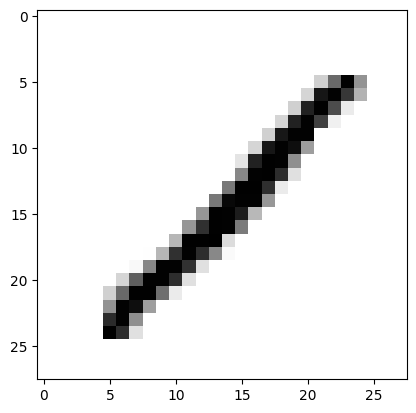

In [133]:
id_to_show = 14001  # max 69999

plt.imshow(data[id_to_show], cmap="gray_r")
print(f"This is {labels[id_to_show]}.")

In [134]:
NUMBER_OF_OUTPUT_DATASETS = 5
cluster_len = len(data) // NUMBER_OF_OUTPUT_DATASETS

set_of_datasets = []
set_of_labels = []

for i in range(NUMBER_OF_OUTPUT_DATASETS):
    cluster = np.array(data[cluster_len * i:cluster_len * i + cluster_len])
    labs = np.array(labels[cluster_len * i:cluster_len * i + cluster_len])

    set_of_datasets.append(cluster)
    set_of_labels.append(labs)

In [135]:
def build_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(units=10, activation="softmax"))

    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

    return model

In [153]:
models = []


def cv(set_of_datasets, set_of_labels):
    results = pd.DataFrame(columns=["i", "accuracy", "loss", "val_accuracy", "val_loss"])

    for j in range(NUMBER_OF_OUTPUT_DATASETS):
        model = build_model()
        valid_data = set_of_datasets[i]
        valid_labels = set_of_labels[i]
        train_data = np.concatenate([set_of_datasets[d] for d in range(len(set_of_datasets)) if d != j], axis=0)
        train_labels = np.concatenate([set_of_labels[d] for d in range(len(set_of_labels)) if d != j], axis=0)

        r = model.fit(train_data, train_labels, epochs=4, batch_size=32,
                      validation_data=(valid_data, valid_labels))

        res = [j, r.history["accuracy"][-1], r.history["loss"][-1], r.history["val_accuracy"][-1],
               r.history["val_loss"][-1]]
        results.loc[len(results)] = res

        models.append(model)

    return results


cv(set_of_datasets, set_of_labels)

Epoch 1/4
1750/1750 [==============================] - 9s 4ms/step - loss: 0.4751 - accuracy: 0.8772 - val_loss: 0.2840 - val_accuracy: 0.9231
Epoch 2/4
1750/1750 [==============================] - 6s 3ms/step - loss: 0.3043 - accuracy: 0.9148 - val_loss: 0.2539 - val_accuracy: 0.9289
Epoch 3/4
1750/1750 [==============================] - 8s 4ms/step - loss: 0.2831 - accuracy: 0.9207 - val_loss: 0.2393 - val_accuracy: 0.9325
Epoch 4/4
1750/1750 [==============================] - 8s 5ms/step - loss: 0.2720 - accuracy: 0.9239 - val_loss: 0.2308 - val_accuracy: 0.9364
Epoch 1/4
1750/1750 [==============================] - 9s 4ms/step - loss: 0.4812 - accuracy: 0.8745 - val_loss: 0.2883 - val_accuracy: 0.9220
Epoch 2/4
1750/1750 [==============================] - 7s 4ms/step - loss: 0.3040 - accuracy: 0.9153 - val_loss: 0.2534 - val_accuracy: 0.9293
Epoch 3/4
1750/1750 [==============================] - 6s 3ms/step - loss: 0.2819 - accuracy: 0.9211 - val_loss: 0.2390 - val_accuracy: 0.9346

,i,accuracy,loss,val_accuracy,val_loss
0,0.0,0.923929,0.272040,0.936429,0.230795
1,1.0,0.923429,0.270942,0.938500,0.230113
2,2.0,0.926286,0.268595,0.936071,0.232171
3,3.0,0.925286,0.267467,0.936071,0.230372
4,4.0,0.922607,0.279156,0.928714,0.253297


In [154]:
for m in models:
    print(m.evaluate(data, labels))

2188/2188 [==============================] - 7s 3ms/step - loss: 0.2650 - accuracy: 0.9267
[0.2650378942489624, 0.926714301109314]
2188/2188 [==============================] - 7s 3ms/step - loss: 0.2648 - accuracy: 0.9278
[0.2648119628429413, 0.9277714490890503]
2188/2188 [==============================] - 7s 3ms/step - loss: 0.2672 - accuracy: 0.9266
[0.26716041564941406, 0.9265857338905334]
2188/2188 [==============================] - 7s 3ms/step - loss: 0.2650 - accuracy: 0.9270
[0.2650032639503479, 0.926971435546875]
2188/2188 [==============================] - 7s 3ms/step - loss: 0.2668 - accuracy: 0.9252
[0.2668169438838959, 0.9252428412437439]
